# Introduction to Topological Data Analysis (TDA)


### Vincent Rouvreau - Inria
### Maintainer of the GUDHI library

## Motivation

![Motivation](img/motivation.png "Motivation")

### Data often have topological / geometric structure

## How many mountains

![Mountains](img/mountains.jpg "credits https://pixabay.com/fr/users/ibigview-4619273/")

### How to identify:
* Small bump on the side of a bigger mountain?
* Independent mountains?

## Prominence (topography) [[source wikipedia]](https://en.wikipedia.org/wiki/Topographic_prominence)

**Local maximum:** how low do you need to go before you can reach a higher maximum?

![prominence](img/prominence.png "credits https://pixabay.com/fr/users/manuelsadaune-8025587/")


## Superlevelsets

<img src="img/superlevelsets.gif" alt="cf. scripts/superlevelsets.py" width="90%" height="auto">


## Superlevelsets

<img src="img/superlevelsets.png" alt="cf. scripts/superlevelsets.py" width="90%" height="auto">

## Ok, but... In topology, we compute sublevelsets

<img src="img/sublevelsets.png" alt="cf. scripts/sublevelsets.py" width="90%" height="auto">

## From barcode to diagram

<img src="img/barcode_to_diagram.png" alt="cf. scripts/barcode_to_diagram.py" width="90%" height="auto">

### Interval (a, b) => Point (a,b)
### Short bar => Point close to the diagonal

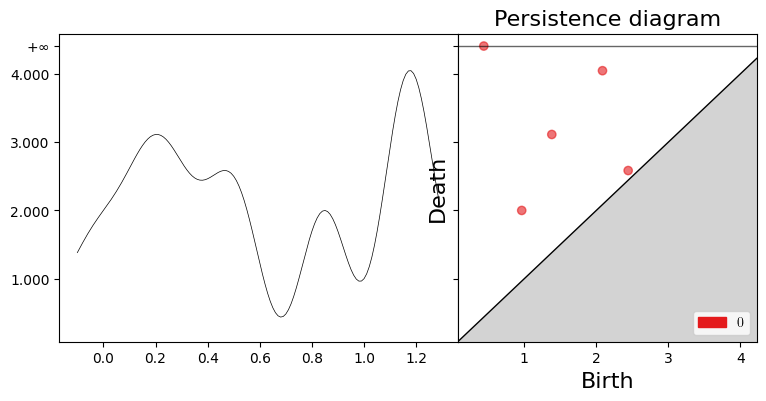

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gudhi as gd

t = np.arange(-0.1, 1.3, 0.01)
s = np.sin(2 * np.pi * t) - t * np.cos(6 * np.pi * t) + 2

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(7, 1), gridspec_kw=dict(width_ratios=[4, 3], wspace=0))
fig.set_size_inches(9, 4)
axes[0].plot(t, s, "k", lw=0.5)

diag = gd.CubicalComplex(top_dimensional_cells=s).persistence()
_ = gd.plot_persistence_diagram(diag, legend=True, axes=axes[1])

## Higher dimension

<img src="img/higher_dim_mountains.jpg" alt="credits https://pixabay.com/fr/users/manuelsadaune-8025587/" width="80%" height="auto">

### Loops are detected (cf. Puy Pariou)


## Stability

<img src="img/stability.png" alt="cf. scripts/stability.py" width="90%" height="auto">

\begin{equation}
\lVert f - g \rVert _\infty = sup _{x \in X} \left\{ \lvert f(x) - g(x) \rvert \right\} 
\end{equation}

**Bottleneck distance:** Partial matching, the rest matched with the diagonal. The worst pair defines the cost

**Stability theorem:** $$ d_B ( Dgm(f) - Dgm(g) ) \le \lVert f - g \rVert _\infty $$

## Representations

![Representations](img/representations.png "cf. scripts/representations.py")


## Independent (?) problem: point clouds

**Input:** point set P

**Assumption:** P approaches some unknown ideal object

## Sublevel sets on a point cloud

<img src="img/pointcloud_sublevelsets.gif" alt="cf. scripts/pointcloud_sublevelsets.py" width="130%" height="auto">

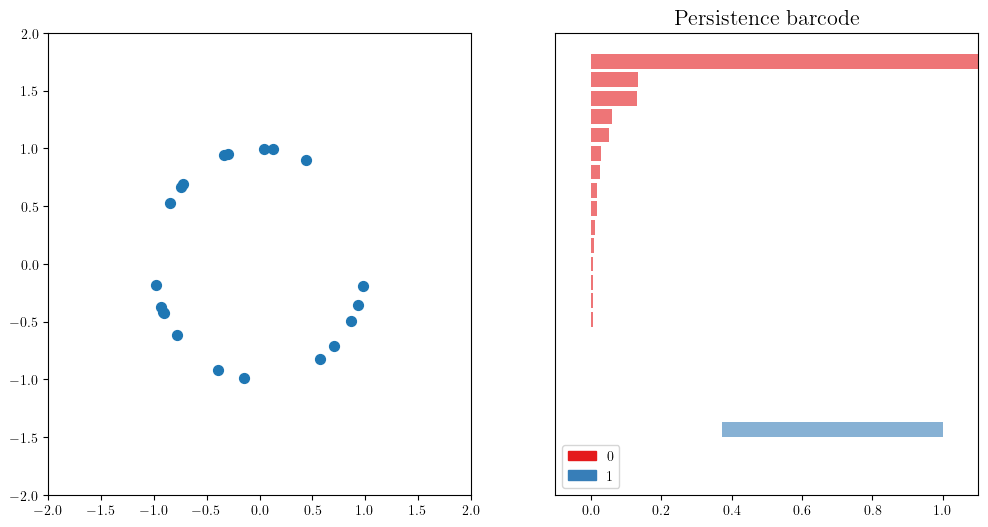

In [2]:
import matplotlib.pyplot as plt
import gudhi as gd
from gudhi.datasets.generators import points

X = points.sphere(n_samples = 20, ambient_dim = 2)
fig, axes = plt.subplots(ncols=2, figsize=(4, 2)); fig.set_size_inches(12, 6)
axes[0].scatter(X[:,0],X[:,1], s=50)
axes[0].set_xlim(-2., 2.); axes[0].set_ylim(-2., 2.)

dgm = gd.AlphaComplex(points=X).create_simplex_tree().persistence()
gd.plot_persistence_barcode(dgm, legend=True, axes=axes[1])
plt.show()

## ToMaTo
### Introduction

${\rm ToMaTo}$ algorithm is exposed in the paper of Frédéric CHAZAL et al., *Persistence-Based Clustering in Riemannian Manifolds* [[1]](https://hal.inria.fr/inria-00389390/document), a clustering method based on the idea of topological persistence.


In short, the algorithm needs a density estimation (so to each point $x$ we associate a value $\hat{f}(x)$) and a neighborhood graph. First, it starts with a mode-seeking phase (naive hill-climbing) to build the initial clusters (each with its own mode), following the connected points in the neighborhood graph. Finally, it merges these initial clusters based on their prominence. This merging has a hierarchical nature, i.e. we always obtain the successive new clusters by merging two existing ones.

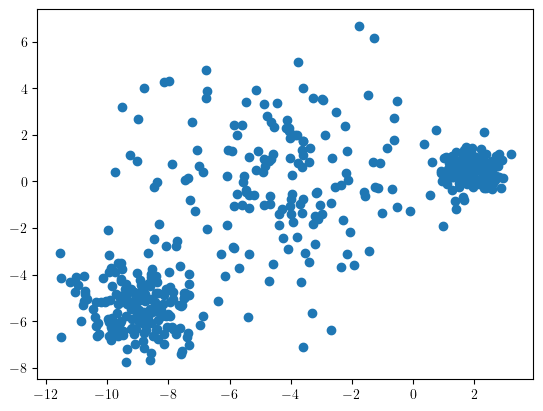

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

varied = datasets.make_blobs(n_samples=500, cluster_std=[1.0, 2.5, 0.5], random_state=170)[0]
x, y = varied.T
plt.scatter(x,y)
plt.show()

## Construction
### 1. Graph
Default is KNN, can be a radius graph or set manually.

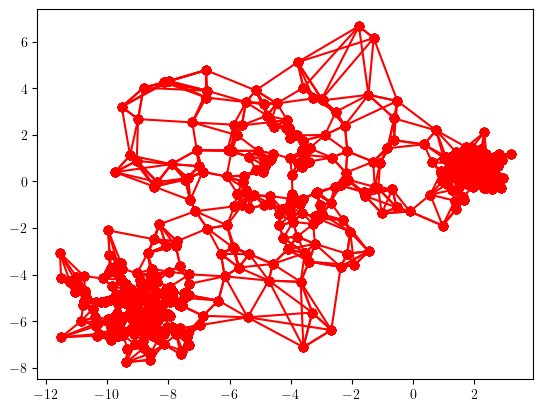

In [4]:
from gudhi.point_cloud.knn import KNearestNeighbors

nbrs = KNearestNeighbors(k=6)
indices = nbrs.fit_transform(varied)
for i in indices:
    Y = np.zeros((2,2))
    for j in range(len(i)):
        Y[0] = [varied[int(i[0])][0], varied[int(i[j])][0]]
        Y[1] = [varied[int(i[0])][1], varied[int(i[j])][1]]
        plt.plot(Y[0], Y[1], 'ro-')

plt.show()

## 2. Density

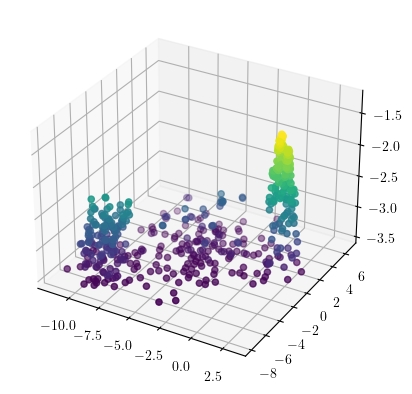

In [5]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=0.1).fit(varied)

z_kde = kde.score_samples(varied)
ax = plt.axes(projection='3d')
_ = ax.scatter(x, y, z_kde, c=z_kde)
plt.show()

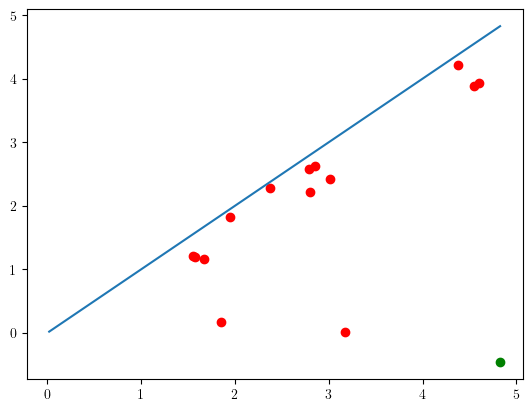

In [6]:
from gudhi.clustering.tomato import Tomato

tomato = Tomato()
tomato.fit(varied)
tomato.plot_diagram()
plt.show()

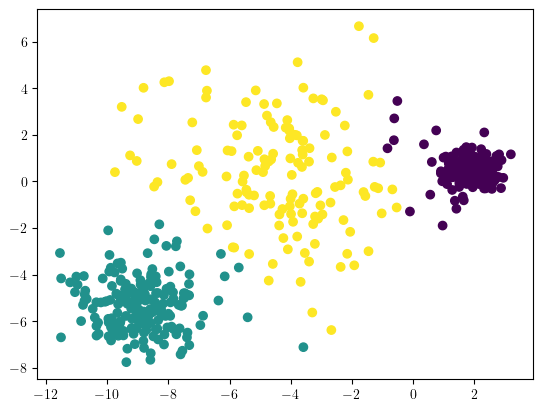

In [7]:
tomato.n_clusters_=3
plt.scatter(x,y,c=tomato.labels_)
plt.show()

## Benchmark [[source]](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

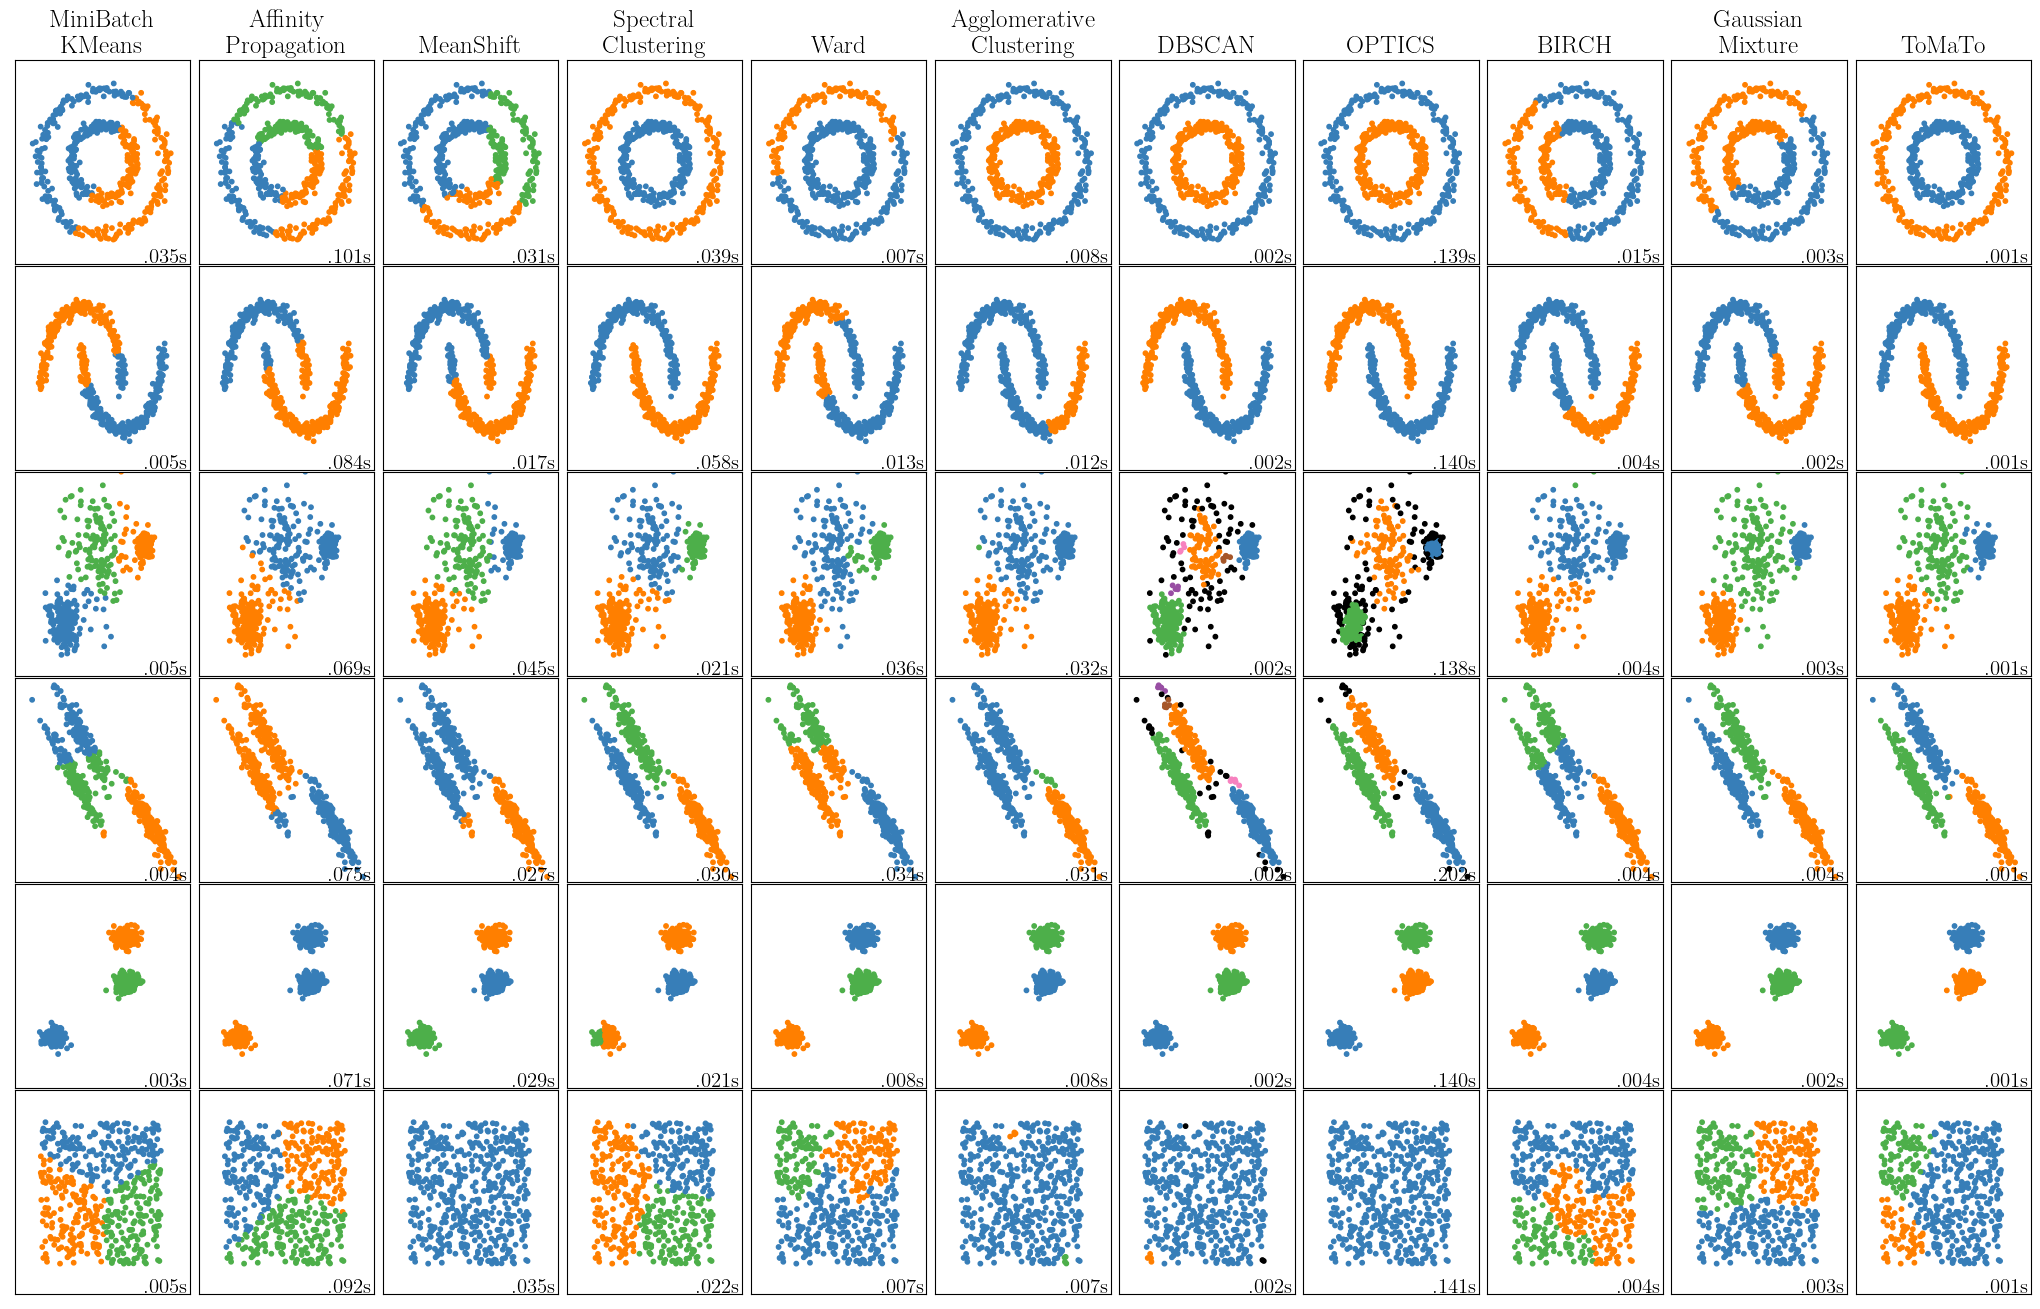

In [8]:
%run ./scripts/plot_cluster_comparison.py

## Mapper

Visualize topology on the data directly. Two types of applications:
* clustering
* feature selection

**Principle:** identify statistically relevant sub-populations through patterns (flares, loops)

<img src="img/mapper.png" alt="credits: https://geometrica.saclay.inria.fr/team/Marc.Glisse/enseignement/cargese2022/class2.pdf" width="70%" height="auto">

### Mapper in applications

<img src="img/mapper_app.png" alt="credits: https://geometrica.saclay.inria.fr/team/Marc.Glisse/enseignement/cargese2022/class2.pdf" width="90%" height="auto">

#### 3d shapes classification

### Mapper in applications

<img src="img/mapper_app_2.png" alt="credits: https://geometrica.saclay.inria.fr/team/Marc.Glisse/enseignement/cargese2022/class2.pdf" width="90%" height="auto">

#### breast cancer subtype identification

### And so many other applications...

### Mapper in the continuous setting

<img src="img/mapper_continuous.png" alt="credits: https://geometrica.saclay.inria.fr/team/Marc.Glisse/enseignement/cargese2022/class2.pdf" width="90%" height="auto">

### Mapper in practice

<img src="img/mapper_practice.png" alt="credits: https://geometrica.saclay.inria.fr/team/Marc.Glisse/enseignement/cargese2022/class2.pdf" width="90%" height="auto">